In [22]:
import matplotlib.pyplot as plt
#from parameters import t_list as t
import pickle
import numpy as np
import sys
sys.path.append('/home/olivervoigt/Python/Eigen/Core_functions')
from parameters import *
from numba import jit

In [2]:
energyresolution = 1000
E_start = -0.015 
E_stop = 0.005
omega_list = np.linspace(E_start/hbar,E_stop/hbar,energyresolution)

blues = plt.get_cmap('Blues')  # this returns a colormap
reds = plt.get_cmap('Reds')  # this returns a colormap
greens = plt.get_cmap('Greens') 

In [23]:
Qdim = '300'
Qmax = '1.5'

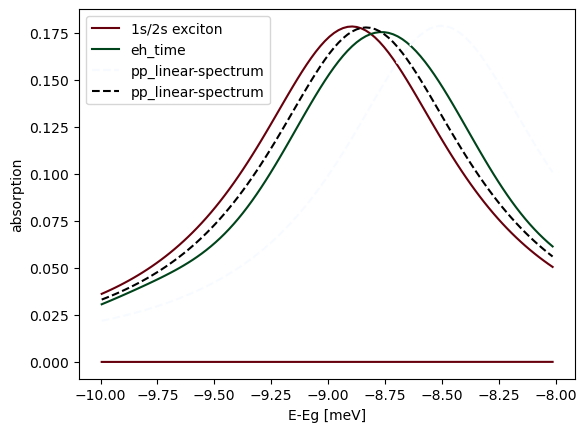

In [6]:
start = 250
end = 350
i = 0
Q_values = [[1.5,2000]] #[[1.5,300],[1.5,500],[1.5,700]]#,[1.5,1200]]#, [2.0,1000]]
for Qmax, Qdim in Q_values:
    dQ = Qmax/Qdim
    qlist  = np.linspace(Qmax/Qdim, Qmax, Qdim)
 

    with open(r"results/Qmax={}_Qdim={}_exciton_absorption_1s.pickle".format(Qmax, Qdim), 'rb') as output_file:
        alpha_1s = pickle.load(output_file)
    with open(r"results/Qmax={}_Qdim={}_exciton_absorption_2s.pickle".format(Qmax, Qdim), 'rb') as output_file:
        alpha_2s = pickle.load(output_file)
 #   with open(r"results/Qmax={}_Qdim={}_eh_spectrum_coulomb.pickle".format(Qmax, Qdim), 'rb') as output_file:
 #       alpha_eh_coulomb = pickle.load(output_file)   
 #   with open(r"results/Qmax={}_Qdim={}_time_spectrum_coulomb.pickle".format(Qmax, Qdim), 'rb') as output_file:
    #    alpha_eh_time = pickle.load(output_file)

    
#eh spectra
#    if i == 0:
 #       plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_eh_coulomb[start:end], label = 'e-h-spectrum', color = blues(1 - float(i)/(len(Q_values))))
  #  else: 
   #     plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_eh_coulomb[start:end],color = blues(1 - float(i)/(len(Q_values))))

#1s spectra
    if i == 0:
        plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_1s[start:end], label = '1s/2s exciton'.format(Qdim,Qmax), color = reds(1 - float(i)/(len(Q_values))))
    else:
        plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_1s[start:end], color = reds(1 - float(i)/(len(Q_values))))

#2s spectra
    plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_2s[start:end], color = reds(1 - float(i)/(len(Q_values))))

#time_spectra
  #  if i == 0:
   #     plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_eh_time[start:end], label = 'eh_time'.format(Qdim,Qmax), color = greens(1 - float(i)/(len(Q_values))))
    #else:
     #   plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_eh_time[start:end], color = greens(1 - float(i)/(len(Q_values))))

    i += 1

with open(r"results/Qmax={}_Qdim={}_tmax=10000_time_spectrum_coulomb.pickle".format(1.5, 700), 'rb') as output_file:
    alpha_eh_time = pickle.load(output_file)
plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_eh_time[start:end], label = 'eh_time'.format(Qdim,Qmax), color = greens(1 - float(0)/(len(Q_values))))

with open(r"results/dt=-9000.0_E1=0.00001_absorption_probe.pickle", 'rb') as output_file:
    alpha_pp = pickle.load(output_file)
plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_pp[start:end], '--',label = 'pp_linear-spectrum', color = blues(1 - float(i)/(len(Q_values))))

with open(r"results/dt=-3000.0_E1=0.0001_Qdim=1000_absorption_probe.pickle", 'rb') as output_file:
    alpha_pp = pickle.load(output_file)
plt.plot(np.linspace(E_start,E_stop,energyresolution)[start:end]*1000,alpha_pp[start:end], '--',label = 'pp_linear-spectrum', color = 'black')


#format plot
plt.xlabel('E-Eg [meV]')
plt.ylabel('absorption')
plt.legend()
#plt.savefig('results/linear_spectra_convergence.pdf')

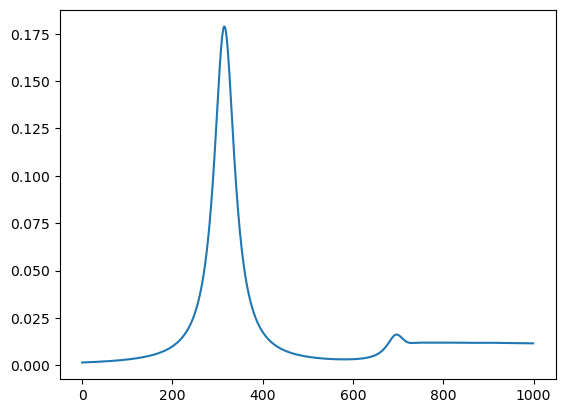

In [10]:
with open(r"results/Qmax={}_Qdim={}_eh_spectrum_coulomb.pickle".format(Qmax, Qdim), 'rb') as output_file:
    alpha_eh_coulomb = pickle.load(output_file)
with open(r"results/Qmax={}_Qdim={}_eh_spectrum_free.pickle".format(Qmax, Qdim), 'rb') as output_file:
    alpha_eh_free = pickle.load(output_file)

plt.plot(alpha_eh_coulomb)

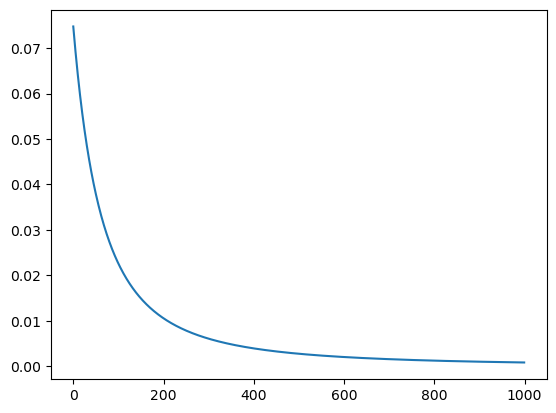

In [28]:
E_R_0 = E_R_mu(EWs,EVs,0)
plt.plot(get_absorption(E_R_0, energyresolution))

In [23]:
Qdim = 500
Qmax = 1.5
dQ = Qmax/Qdim
qlist  = np.linspace(Qmax/Qdim, Qmax, Qdim)
@jit(nopython = True)
def phi0(EVs,mu):
    ''' returns the exciton orbital mu value at r = 0'''
    phi0 = 0.
    for j in range(Qdim):
        q = qlist[j] 
        phi0 += q*dQ/2/np.pi*EVs[j,mu]    
    return phi0    

def chi(EWs,EVs, mu, omega):
    return -d_cv**2/epsilon_0 * np.abs(phi0(EVs,mu))**2*(1/(hbar*(omega-EWs[mu]/hbar + 1j*gamma + 1j* d_cv**2 * np.abs(phi0(EVs,mu))**2 *omega_2/(2*hbar*c*n_ref*epsilon_0))))#+1/(hbar*(-omega-E_G/hbar-EWs[mu]/hbar - 1j*gamma - 1j*d_cv**2 * np.abs(phi0(EVs,mu))**2 *omega/(epsilon_0*c*n_ref))))

        
def E_R_mu(EWs,EVs, mu):
    '''E_R/E_0, emitted field per incoming field'''
    E_R = []
    for omega in omega_list:    
        E_R.append(1j*omega_2/(2*epsilon_0 * c*n_ref)* epsilon_0 * chi(EWs,EVs,mu,omega))
    return E_R

def get_absorption(E_R, energyresolution):
    R = np.absolute(E_R)**2
    T = np.absolute(np.ones(energyresolution, dtype = 'complex_')+E_R) **2
    return np.ones(energyresolution)- R - T



In [24]:
energyresolution = 1000
E_start = -0.015 
E_stop = 0.005
omega_list = np.linspace(E_start/hbar,E_stop/hbar,energyresolution)
with open(r"results/alt/Qmax={}_Qdim={}_exciton_EWs.pickle".format(Qmax, Qdim), 'rb') as input_file:
    EWs = pickle.load(input_file)
with open(r"results/alt/Qmax={}_Qdim={}_exciton_EVs.pickle".format(Qmax, Qdim), 'rb') as input_file:
    EVs = pickle.load(input_file)

 #with open(r"results/alt/Qmax={}_Qdim={}_exciton_absorption_1s.pickle".format(Qmax, Qdim), 'rb') as input_file:
  #  exciton_1s = pickle.load(input_file)
E_R_0 = E_R_mu(EWs,EVs,0)
abs_1s = get_absorption(E_R_0, energyresolution)
E_R_1 = E_R_mu(EWs,EVs,1)
abs_2s = get_absorption(E_R_1, energyresolution)
with open(r"results/alt/Qmax={}_Qdim={}_eh_spectrum_coulomb.pickle".format(Qmax, Qdim), 'rb') as input_file:
    alpha_eh_coulomb = pickle.load(input_file)
with open(r"results/alt/Qmax={}_Qdim={}_eh_spectrum_free.pickle".format(Qmax, Qdim), 'rb') as input_file:
    alpha_eh_free = pickle.load(input_file)

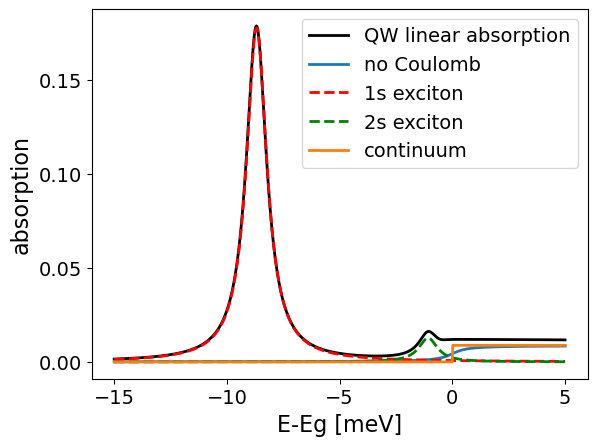

In [42]:

#omega_list += np.real(EWs[0])/hbar

    
def theta(x):
    if x< 0:
        return 0
    else:
        return (x+E_G/hbar) *  d_cv**2 *mu/(2*c*n_ref*epsilon_0*hbar**2) 

plt.plot(1000*hbar*np.array(omega_list),alpha_eh_coulomb, '-k',label = 'QW linear absorption', linewidth = 2)
#compute reflection and transmission without coulomb
plt.plot(1000*hbar*np.array(omega_list),alpha_eh_free, label = 'no Coulomb', linewidth = 2)


plt.plot(1000*hbar*np.array(omega_list),abs_1s, 'r--',label = '1s exciton', linewidth = 2)
plt.plot(1000*hbar*np.array(omega_list),abs_2s, 'g--',label = '2s exciton', linewidth = 2)
plt.plot(1000*hbar*np.array(omega_list), np.array([theta(i) for i in omega_list]), label = 'continuum', linewidth = 2)

#format plot
plt.xlabel('E-Eg [meV]', fontsize = 16)
plt.ylabel('absorption', fontsize = 16)
plt.xticks([-15, -10, -5, 0, 5],fontsize = 14)
plt.yticks([0.00, 0.05, 0.10, 0.15],fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('results/absorption_linear_Qmax={}_Qdim={}.pdf'.format(Qmax, Qdim), bbox_inches = 'tight')

In [7]:
omega_list - E_G/hbar

array([-4.60961431, -4.60958389, -4.60955348, -4.60952306, -4.60949265,
       -4.60946223, -4.60943182, -4.6094014 , -4.60937098, -4.60934057,
       -4.60931015, -4.60927974, -4.60924932, -4.60921891, -4.60918849,
       -4.60915807, -4.60912766, -4.60909724, -4.60906683, -4.60903641,
       -4.60900599, -4.60897558, -4.60894516, -4.60891475, -4.60888433,
       -4.60885392, -4.6088235 , -4.60879308, -4.60876267, -4.60873225,
       -4.60870184, -4.60867142, -4.60864101, -4.60861059, -4.60858017,
       -4.60854976, -4.60851934, -4.60848893, -4.60845851, -4.6084281 ,
       -4.60839768, -4.60836726, -4.60833685, -4.60830643, -4.60827602,
       -4.6082456 , -4.60821519, -4.60818477, -4.60815435, -4.60812394,
       -4.60809352, -4.60806311, -4.60803269, -4.60800227, -4.60797186,
       -4.60794144, -4.60791103, -4.60788061, -4.6078502 , -4.60781978,
       -4.60778936, -4.60775895, -4.60772853, -4.60769812, -4.6076677 ,
       -4.60763729, -4.60760687, -4.60757645, -4.60754604, -4.60